<a href="https://colab.research.google.com/github/mahi01agarwal/A-CNN-Architecture-to-Detect-PCOS-from-Ovarian-Ultrasound-Images/blob/main/PCOSdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d anaghachoudhari/pcos-detection-using-ultrasound-images

 98% 123M/126M [00:01<00:00, 86.2MB/s]
100% 126M/126M [00:01<00:00, 82.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/pcos-detection-using-ultrasound-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
import cv2
from tqdm import tqdm

datadir = r'/content/data/test'  # Path to directory with class subdirectories holding the image files
bad_img_list = []  # Will be a list of defective images
classes = sorted(os.listdir(datadir))  # A list of classes within the datadir

def is_infected_image(image_path):
    try:
        index = image_path.rfind('.')  # Find the rightmost . in image_path
        ext = image_path[index + 1:].lower()  # Get the file's extension and convert it to lowercase
        good_ext = ['jpg', 'jpeg', 'bmp', 'png']  # List of allowable extensions for image_dataset_from_directory
        if ext not in good_ext:
            return True  # Return True if the extension is not allowed
        img = cv2.imread(image_path)  # Read in the image
        shape = img.shape  # Get the image shape (height, width) or (height, width, channels)
        count = len(shape)
        if count == 2:  # If shape is (width, height), the image is single-channel
            channels = 1
        else:
            channels = shape[2]  # Shape is (width, height, channels)
        if channels == 2:
            return True  # Return True if the image has 2 channels
    except:
        return True  # Return True if any other exception occurs
    return False  # Return False if the image is not infected

# Iterate through each class and its images
for klass in classes:
    classpath = os.path.join(datadir, klass)
    flist = sorted(os.listdir(classpath))  # List of files in the current class

    for f in tqdm(flist, ncols=100, unit='files', colour='blue', desc=klass):
        fpath = os.path.join(classpath, f)  # Path to the image file

        if is_infected_image(fpath):
            # Append the path to the list of bad_img_list
            bad_img_list.append(fpath)
            os.remove(fpath)  # Remove the infected image file

if len(bad_img_list) > 0:
    print('Below is a list of defective image filepaths that were removed:')
    for f in bad_img_list:
        print(f)


notinfected: 100%|██████████████████████████████████████████| 1145/1145 [00:06<00:00, 190.17files/s]

Below is a list of defective image filepaths that were removed:
/content/data/test/infected/OIP.jpg
/content/data/test/infected/R.jpg
/content/data/test/infected/WhatsApp Image 2022-04-01 at 3.49.22 PM.jpeg
/content/data/test/infected/WhatsApp Image 2022-04-01 at 3.49.45 PM.jpeg
/content/data/test/infected/WhatsApp Image 2022-04-01 at 3.50.05 PM.jpeg
/content/data/test/infected/WhatsApp Image 2022-04-01 at 3.50.20 PM.jpeg
/content/data/test/notinfected/OIP (1).jpg
/content/data/test/notinfected/WhatsApp Image 2022-04-01 at 3.35.25 PM.jpeg
/content/data/test/notinfected/WhatsApp Image 2022-04-01 at 3.39.07 PM.jpeg
/content/data/test/notinfected/img_0_7.jpg


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224,224)
)

Found 1924 files belonging to 2 classes.
Found 1922 files belonging to 2 classes.


In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))



model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
my_model = model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
61/61 [==============================] - 25s 146ms/step - loss: 2.8206 - accuracy: 0.5364 - val_loss: 0.4532 - val_accuracy: 0.8075
Epoch 2/10
61/61 [==============================] - 11s 172ms/step - loss: 1.4582 - accuracy: 0.5748 - val_loss: 0.3507 - val_accuracy: 0.9048
Epoch 3/10
61/61 [==============================] - 7s 112ms/step - loss: 0.8981 - accuracy: 0.6460 - val_loss: 0.3012 - val_accuracy: 0.9396
Epoch 4/10
61/61 [==============================] - 8s 126ms/step - loss: 0.6284 - accuracy: 0.7173 - val_loss: 0.2648 - val_accuracy: 0.9516
Epoch 5/10
61/61 [==============================] - 8s 126ms/step - loss: 0.5043 - accuracy: 0.7516 - val_loss: 0.2285 - val_accuracy: 0.9677
Epoch 6/10
61/61 [==============================] - 7s 109ms/step - loss: 0.4248 - accuracy: 0.8113 - val_loss: 0.1930 - val_accuracy: 0.9709
Epoch 7/10
61/61 [==============================] - 7s 113ms/step - loss: 0.3603 - accuracy: 0.8368 - val_loss: 0.1578 - val_accuracy: 0.9844
Epoc

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/data/test/notinfected/img3.jpg')
test_img = cv2.resize(test_img,(224,224))
test_input = test_img.reshape((1,224,224,3))
model.predict(test_input)

1/1 [==============================] - 0s 309ms/step


array([[0.9250948]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/data/test/notinfected/img4.jpg')
test_img = cv2.resize(test_img,(224,224))
test_input = test_img.reshape((1,224,224,3))
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[0.980803]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/data/test/infected/img4.jpg')
test_img = cv2.resize(test_img,(224,224))
test_input = test_img.reshape((1,224,224,3))
model.predict(test_input)

1/1 [==============================] - 0s 111ms/step


array([[0.04365268]], dtype=float32)

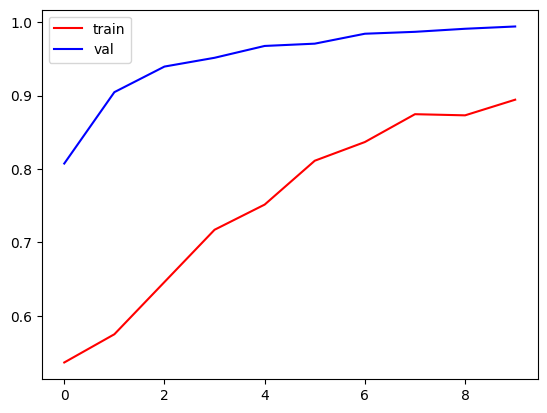

In [ ]:
import matplotlib.pyplot as plt

plt.plot(my_model.history['accuracy'],color='red',label='train')
plt.plot(my_model.history['val_accuracy'],color='blue',label='val')
plt.legend()
plt.show()

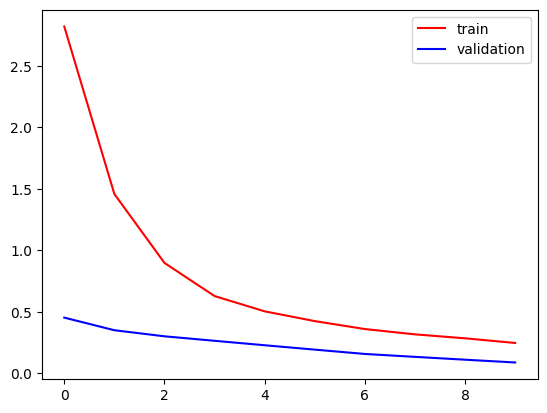

In [ ]:
plt.plot(my_model.history['loss'],color='red',label='train')
plt.plot(my_model.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
my_model.history['accuracy']

[0.5363825559616089,
 0.5748440623283386,
 0.6460499167442322,
 0.717255711555481,
 0.7515592575073242,
 0.8113305568695068,
 0.8367983102798462,
 0.8747401237487793,
 0.8731808662414551,
 0.894490659236908]

In [ ]:
my_model.history['val_accuracy']

[0.807492196559906,
 0.9047867059707642,
 0.9396461844444275,
 0.9516128897666931,
 0.9677419066429138,
 0.9708636999130249,
 0.9843912720680237,
 0.9869927167892456,
 0.9911550283432007,
 0.9942768216133118]